In [6]:
import scipy.io as scio
import numpy as np
import os
from tqdm.auto import tqdm, trange
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sci_analysis import analyze
%matplotlib inline
np.random.seed(12)

In [4]:
dist1 = st.norm.rvs(82, 4, size=25).astype(int) #mean of 82, standard deviation of 4
dist2 = st.norm.rvs(77, 7, size=25).astype(int) #mean of 77, standard deviation of 7
print(dist1)
print(dist2)

[83 79 82 75 85 75 82 81 78 93 79 83 86 77 87 81 86 78 77 86 84 82 84 84
 77]
[61 65 64 61 72 73 76 78 74 75 77 70 72 77 72 72 76 86 79 74 72 76 92 54
 80]


In [7]:
os.chdir('/Users/sheeta/Desktop/learn_torch')

lightdata = scio.loadmat('Room_light.mat')
lightdata = torch.Tensor(lightdata['light'])
light = torch.transpose(lightdata,0,1)
npcdata = scio.loadmat('NPC_database.mat')
npcdata = torch.Tensor(npcdata['NPC_spec'])
npc = torch.transpose(npcdata,0,1)

In [39]:
for i in range(len(npc)):
    tmp = anpc[i]
    tmp = tmp.numpy()
    npc[i] = npc[i] - int(np.mean(tmp))
    

In [40]:
npc[0]

tensor([-1.0073, -0.9740, -0.9432, -0.7978, -0.8898, -0.7160, -0.7390, -0.8464,
        -0.8701, -0.7614, -0.8794, -0.7724, -0.6154, -0.6710, -0.7187, -0.6754,
        -0.6362, -0.5745, -0.4033, -0.2299, -0.1366, -0.0893, -0.0578,  0.0201,
         0.0362,  0.0243, -0.0126, -0.0721, -0.1176, -0.1495,  0.0599,  0.2011,
         0.3365,  0.2086,  0.1541, -0.0145, -0.2928, -0.2792, -0.2167, -0.3202,
        -0.4798, -0.2389, -0.4467, -0.6341, -0.6904, -0.6413, -0.9226, -1.0234,
        -0.9395, -0.8577, -0.8723, -0.6067, -0.5270, -0.4955, -0.5385, -0.6511,
        -0.8160, -0.7018, -0.7694, -0.7703, -0.5389, -0.5628, -0.5766, -0.4291,
        -0.2530, -0.4769, -0.3459, -0.2770, -0.2580, -0.3573, -0.1137, -0.1338,
        -0.0454, -0.1061,  0.0362,  0.0156,  0.0706,  0.0263,  0.0674, -0.0447,
        -0.0309, -0.0439, -0.0747,  0.0201,  0.1397,  0.1078,  0.0353,  0.1461,
        -0.0493, -0.0335, -0.1340, -0.2359, -0.4883, -0.4465, -0.7911, -0.8442,
        -0.9650, -1.0353, -0.9807, -0.90

In [38]:
npc[0] = npc[0].numpy()

TypeError: can't assign a numpy.ndarray to a torch.FloatTensor

In [13]:
test1 = npc[0]
print(test1.mean())
print(test1.std())
test2 = npc[1]
print(test2.mean())
print(test2.std())
test3 = npc[2]
print(test3.mean())
print(test3.std())
test4 = npc[3]
print(test4.mean())
print(test4.std())
test5 = npc[4]
print(test5.mean())
print(test5.std())
test6 = npc[5]
print(test6.mean())
print(test6.std())
test7 = npc[6]
print(test7.mean())
print(test7.std())


tensor(1.4249)
tensor(1.2374)
tensor(1.4537)
tensor(1.2144)
tensor(1.4364)
tensor(1.2086)
tensor(1.4792)
tensor(1.2075)
tensor(1.5207)
tensor(1.2416)
tensor(1.3881)
tensor(1.1922)
tensor(1.4445)
tensor(1.1892)


In [24]:
#test1 = test1.numpy()
#test6 = test6.numpy()

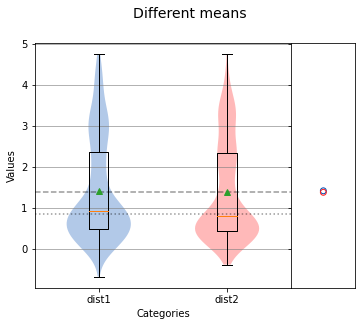



Overall Statistics
------------------

Number of Groups =  2
Total            =  1558
Grand Mean       =  1.4065
Pooled Std Dev   =  1.2150
Grand Median     =  0.8667


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
779            1.4249        1.2374       -0.6699        0.9253        4.7559       dist1         
779            1.3881        1.1922       -0.3753        0.8081        4.7591       dist2         


Levene Test
-----------

alpha   =  0.0500
W value =  0.0004
p value =  0.9834

H0: Variances are equal



Mann Whitney U Test
-------------------

alpha   =  0.0500
u value =  312372.0000
p value =  0.3134

H0: Locations are matched

dist1 mean: 1.4248603582382202 std dev: 1.2366156578063965
dist2 mean: 1.3881012201309204 std dev: 1.1914713382720947


In [25]:
#small difference, try to improve
analyze(
    {'dist1': test1, 'dist2': test6},
    title='Different means',
    nqp=False,
)
print(f'dist1 mean: {np.mean(test1)} std dev: {np.std(test1)}') #dist1
print(f'dist2 mean: {np.mean(test6)} std dev: {np.std(test6)}')

In [27]:
dist1_norm = test1 - int(np.mean(test1))
dist2_norm = test6 - int(np.mean(test6))
print(dist1_norm)
print(dist2_norm)

[-1.0073048  -0.9740245  -0.94323283 -0.7978422  -0.8897678  -0.7159821
 -0.7389799  -0.8464321  -0.8701184  -0.7614354  -0.87939024 -0.77238095
 -0.61540353 -0.67104757 -0.71869254 -0.67537665 -0.636191   -0.57449067
 -0.40334916 -0.22986019 -0.13658512 -0.0892638  -0.05781251  0.02006829
  0.03619301  0.02425492 -0.01264524 -0.07209879 -0.11755961 -0.14954859
  0.05991066  0.20113862  0.3364818   0.20855045  0.15408146 -0.01446885
 -0.29278356 -0.27921873 -0.21667951 -0.32022732 -0.47978604 -0.23889989
 -0.4467011  -0.634081   -0.69037676 -0.64132965 -0.92255014 -1.023433
 -0.9394864  -0.85774595 -0.8722839  -0.6067302  -0.526965   -0.49550873
 -0.53847027 -0.65107095 -0.8159679  -0.7018273  -0.76938933 -0.7702723
 -0.53885853 -0.5627873  -0.57655394 -0.42905557 -0.25302613 -0.47693574
 -0.34593803 -0.27696335 -0.2580347  -0.35732925 -0.11373425 -0.13377213
 -0.04538488 -0.10609215  0.0362277   0.01561451  0.07064593  0.02626741
  0.06739497 -0.04473799 -0.03088766 -0.04389942 -0.074

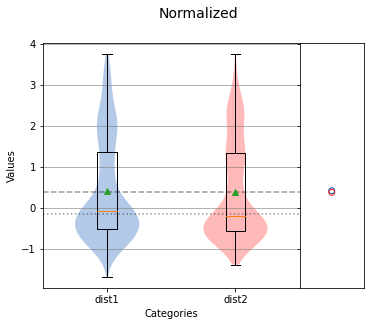



Overall Statistics
------------------

Number of Groups =  2
Total            =  1558
Grand Mean       =  0.4065
Pooled Std Dev   =  1.2150
Grand Median     = -0.1333


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
779            0.4249        1.2374       -1.6699       -0.0747        3.7559       dist1         
779            0.3881        1.1922       -1.3753       -0.1919        3.7591       dist2         


Levene Test
-----------

alpha   =  0.0500
W value =  0.0004
p value =  0.9834

H0: Variances are equal



Mann Whitney U Test
-------------------

alpha   =  0.0500
u value =  312372.0000
p value =  0.3134

H0: Locations are matched

dist1 mean: 0.4248603284358978 std dev: 1.236615777015686
dist2 mean: 0.38810133934020996 std dev: 1.1914713382720947


In [29]:
analyze(
    {'dist1': dist1_norm, 'dist2': dist2_norm},
    title='Normalized',
    nqp=False,
)
print(f'dist1 mean: {np.mean(dist1_norm)} std dev: {np.std(dist1_norm)}')
print(f'dist2 mean: {np.mean(dist2_norm)} std dev: {np.std(dist2_norm)}')

In [46]:
dist1_norm == tt

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
tt = npc[0]

In [44]:
tt = tt.numpy()